# COURSE: Master math by coding in Python
## SECTION: Linear algebra

#### https://www.udemy.com/course/math-with-python/?couponCode=MXC-DISC4ALL
#### INSTRUCTOR: sincxpress.com

Note about this code: Each video in this section of the course corresponds to a section of code below. Please note that this code roughly matches the code shown in the live recording, but is not exactly the same -- the variable names, order of lines, and parameters may be slightly different. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from IPython.display import display,Math

# VIDEO: Vectors

In [4]:
row_vec = np.array([4,2])
col_vec = np.array([ 
    [-2], 
    [3] ])
print(row_vec)
print('-----------')
print(col_vec)
print('-----------')

[4 2]
-----------
[[-2]
 [ 3]]
-----------


In [7]:
display(Math(sym.latex(sym.sympify(row_vec))))
display(Math(sym.latex(sym.sympify(col_vec))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [14]:
# check out the sizes
print(np.shape(row_vec))
print(np.shape(col_vec))

(2,)
(2, 1)


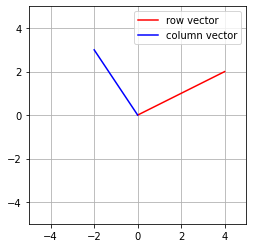

In [18]:
plt.plot([0, row_vec[0]], [0, row_vec[1]], 'r', label='row vector')
plt.plot([0, col_vec[0]], [0, col_vec[1]], 'b', label='column vector')

plt.axis('square')
plt.axis([-5, 5, -5, 5])
plt.grid()
plt.legend()
plt.show()

### Exercises

# VIDEO: Adding and scalar-multiplying vectors

### Exercise

# VIDEO: The dot product

### Exercise

# VIDEO: Dot product application: Correlation coefficient

# VIDEO: The outer product

### Exercise

# VIDEO: Matrix multiplication

### Exercise

# VIDEO: Transposing matrices and vectors

### Exercise

# VIDEO: Various special matrices

### Exercise

# VIDEO: Matrix inverse

### Exercise

# VIDEO: Solving a system of equations

### Exercise

# VIDEO: Visualizing matrix-vector multiplication

### Exercise

# VIDEO: Eigenvalues and eigenvectors

### Exercise

# VIDEO: Singular value decomposition

### Exercise

# Linear algebra BUG HUNT!!